In [22]:
import pickle
import numpy
import seaborn
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
aminotonumber = pickle.load(open("aminotonumber.pkl", "rb"))
allele_dic = pickle.load(open("allele_dic.pkl", "rb"))
translate = pickle.load(open("translate.pkl", "rb"))

translate2 = {}
for key, value in translate.items():
    translate2[key.replace("U", "T")] = value

0.49657494485080794


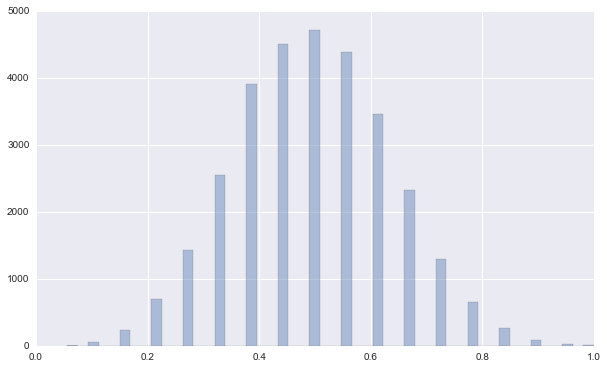

In [23]:
# confirm there are no duplicate barcodes
for key, value in allele_dic.items():
    if (len(value) > 1):
        print(len(value))

# check GC content
gcs = []
total_length = 0
for barcode in allele_dic.keys():
    gcs.append((barcode.count('G') + barcode.count('C')) / len(barcode))

print(sum(gcs) / len(gcs))
seaborn.set(rc={"figure.figsize": (10, 6)})
seaborn.distplot(gcs, kde=False, hist=True)
plt.savefig("barcode_gc.png")

{'M': 1, 'T': 4, 'D': 2, 'L': 6, 'W': 1, 'K': 2, 'C': 2, 'Q': 2, 'Y': 2, 'I': 3, 'A': 4, 'STOP': 3, 'H': 2, 'G': 4, 'P': 4, 'V': 4, 'N': 2, 'R': 6, 'F': 2, 'E': 2, 'S': 6}


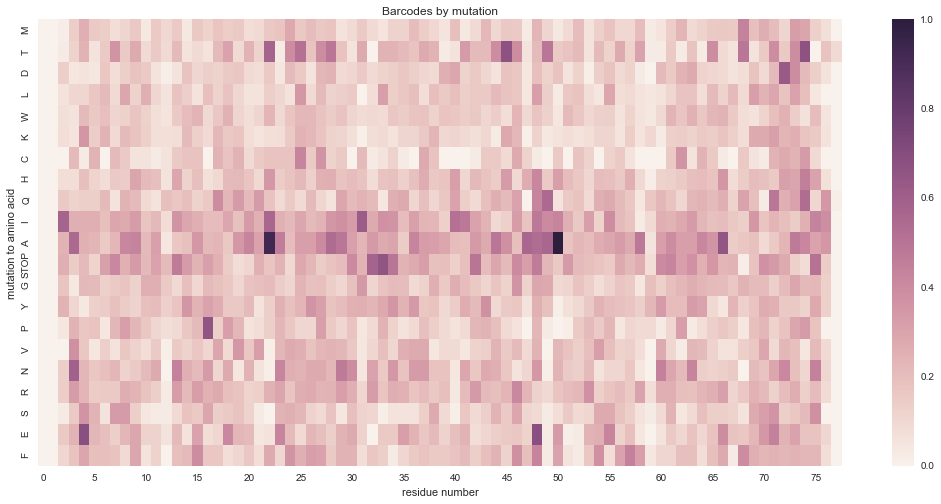

In [24]:
# Is there a combination of residue number and mutated-to residue that is enriched?

array = numpy.zeros((78, 21))

# normalize by number of codons coding for the AA
num_codons = {aa: 0 for aa in aminotonumber.keys()}
for codon, aa in translate2.items():
    num_codons[aa] += 1
print(num_codons)

for key, value in allele_dic.items():
    resnum, codon = value[0].split("_")
    resnum = int(resnum)
    aa = translate2[codon]
    array[resnum, aminotonumber[aa]] += 1.0 / num_codons[aa]

array = array / array.max()

df = pandas.DataFrame(array, columns = aminotonumber.keys()).T
#print(df.describe())

seaborn.set(rc={"figure.figsize": (18, 8)})
#plt.figure(figsize=(18, 8))
seaborn.heatmap(df, xticklabels = 5)
seaborn.axlabel("residue number", "mutation to amino acid")
plt.title("Barcodes by mutation")
plt.savefig("barcodes_by_mutation.png")


0.5859783176593408


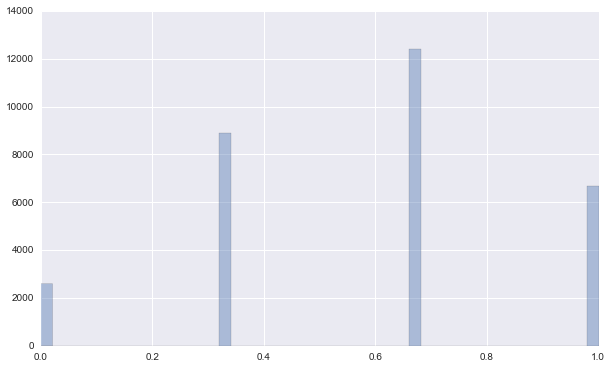

In [26]:
# Are GC-rich codons favored?

gcs = []
for key, value in allele_dic.items():
    resnum, codon = value[0].split("_")
    gcs.append((codon.count('G') + codon.count('C')) / len(codon))

print(sum(gcs) / len(gcs))
seaborn.set(rc={"figure.figsize": (10, 6)})
seaborn.distplot(gcs, kde=False, hist=True)
plt.savefig("mutation_gc.png")